## Opsætning - Skal ikke ændres

In [ ]:
from pickle import load
from keras.models import load_model
from keras.utils import pad_sequences
import matplotlib.pyplot as plt

In [ ]:
# Clone the entire repo.
!git clone -l -s git://github.com/CCTD-CS/ModelFilesForTextGeneration.git cloned-repo
# %cd cloned-repo
# !ls

Cloning into 'cloned-repo'...
fatal: unable to connect to github.com:
github.com[0: 140.82.113.3]: errno=Connection timed out



In [ ]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://github.com/CCTD-CS/ModelFilesForTextGeneration/blob/c3a62be32d30cd275c92a51e6cc838fbab43dfaf/eventyr_100epoch

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  124k    0  124k    0     0   216k      0 --:--:-- --:--:-- --:--:--  215k


In [ ]:
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://github.com/CCTD-CS/ModelFilesForTextGeneration/blob/c3a62be32d30cd275c92a51e6cc838fbab43dfaf/eventyr_100epoch.h5

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  125k    0  125k    0     0   251k      0 --:--:-- --:--:-- --:--:--  251k


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

MessageError: ignored

In [ ]:
import pydrive

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
# file_id = '16DjkbJZfdvjtrHWbc2cme_2RHUOgrq5U'
file_id = '1BtkwQk7L1r4Fj_WRtKZ97rpa7YHsXw5-'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

UnicodeDecodeError: ignored

In [ ]:
seq_len = 25


/content/eventyr_100epoch.h5

eventyr100 = load_model('/content/eventyr_100epoch.h5')
eventyrtokenizer = load(open('/content/eventyr_100epoch','rb'))

model100 = load_model('/content/drive/MyDrive/Colab Notebooks/Modeller/saga_100epoch.h5')
tokenizer100 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/saga_100epoch','rb'))

model200 = load_model('/content/drive/MyDrive/Colab Notebooks/Modeller/saga_200epoch.h5')
tokenizer200 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/saga_200epoch','rb'))

model300 = load_model('/content/drive/MyDrive/Colab Notebooks/Modeller/saga_300epoch.h5')
tokenizer300 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/saga_300epoch','rb'))

model400 = load_model('/content/drive/MyDrive/Colab Notebooks/Modeller/saga_400epoch.h5')
tokenizer400 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/saga_400epoch','rb'))

history_accuracy100 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/saga_100epoch_history_accuracy','rb'))
history_valaccuracy100 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/saga_100epoch_history_valaccuracy','rb'))

history_accuracy200 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/saga_200epoch_history_accuracy','rb'))
history_valaccuracy200 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/saga_200epoch_history_valaccuracy','rb'))

history_accuracy300 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/saga_300epoch_history_accuracy','rb'))
history_valaccuracy300 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/saga_300epoch_history_valaccuracy','rb'))

history_accuracy400 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/saga_400epoch_history_accuracy','rb'))
history_valaccuracy400 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/saga_400epoch_history_valaccuracy','rb'))

OSError: ignored

In [ ]:
def generate_text(epochs, seed_text, num_gen_words):
    '''
    INPUTS:
    epochs : Antal epochs
    seed_text : Tekst der skal fungere som starten
    num_gen_words : Antal ord der skal genereres
    '''
    match epochs:
      case 100:
        model = model100
        tokenizer = tokenizer100
      case 200:
        model = model200
        tokenizer = tokenizer200
      case 300:
        model = model300
        tokenizer = tokenizer300
      case 400:
        model = model400
        tokenizer = tokenizer400
      case _:
        return

    # Endelige output
    output_text = []

    # Oprindelige starttekst
    input_text = seed_text

    # Generer antallet af ord
    for i in range(num_gen_words):

        # Tag inputteksten og lav den til en sekvens
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]

        # Lav starteksten om til samme længde som for den trænede model.
        # Pre betyder, at den fjerner fra starten af sætningen, hvis det er nødvendigt.
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

        # Forudsig sandsynligheden for hvert ord.
        predict = model.predict(pad_encoded, verbose=0)[0]

        # Få indexet til ordet med den største sandsynlighed.
        pred_word_ind = predict.argmax()

        # Få ordet
        pred_word = tokenizer.index_word[pred_word_ind]

        # Opdater inputteksten, så det nye ord bruges til at forudsige det næste ord.
        input_text += ' ' + pred_word

        # Tilføj det nye ord til outputteksten.
        output_text.append(pred_word)

    # Formatterer det, så det ligner en sætning
    return ' '.join(output_text)

In [ ]:
def plotAccuracy(epochs):
  match epochs:
    case 100:
      accuracy = history_accuracy100
      valaccuracy = history_valaccuracy100
    case 200:
      accuracy = history_accuracy200
      valaccuracy = history_valaccuracy200
    case 300:
      accuracy = history_accuracy300
      valaccuracy = history_valaccuracy300
    case 400:
      accuracy = history_accuracy400
      valaccuracy = history_valaccuracy400
    case _:
      return

  plt.plot(accuracy)
  plt.plot(valaccuracy)
  plt.title('Modellens nøjagtighed')
  plt.ylabel('Nøjagtighed')
  plt.xlabel('Epoch')
  plt.legend(['træning', 'test'], loc='upper left')
  plt.show()

# Islandske Sagaer

### Introduktion
Ud fra fire islandske sagaer, har vi trænet nogle sprogmodeller, så du kan eksperimentere med at lave dine egne sagaer. Vi har brugt de fire islandske sagaer:


*   Erik Den Rødes Saga
*   Eyrbyggja Saga
*   Færingernes Saga
*   Grønlændernes Saga

Sagaerne kan I se i hver sin fil.

## Tekstgenerering

Ud fra sagaerne har vi trænet tre sprogmodeller i henholdsvis 100, 200 og 300 epochs. Det betyder, at vi har brugt forskellig tid på at træne modellerne. Desto flere epochs en model er trænet over, desto længere tid tager den at træne.


### Hvordan trænes modellerne?

Sagaerne er blevet delt op i sekvenser med en længde på 26 ord, og i de fire sagaer er der i alt 64.971 sekvenser. Der kan både være punktummer og et nyt afsnit, i det modellen anser som en sekvens. Modellen forsøger at gætte det 26. ord i hver sekvens på baggrund af de 25 ord første ord.

Når modellerne trænes, bliver de bedre og bedre til at gætte det 26. ord i hver sekvens. Deres nøjagtighed bliver opgjort ved at se, hvor stor en andel af de 26. ord, som modellen gætter rigtigt.

## 100 epochs - den mest simple model

Denne model er trænet i cirka 50 minutter og har en nøjagtighed på cirka 40%

I diagrammet nedenfor ses det, hvordan nøjagtigheden stiger, desto længere tid modellen er trænet på. Der er både angivet træning og test.

*Træning* er modellens nøjagtighed på det data, som den forsøger at træne sig selv på.

*Test* er modellens nøjagtighed, når den testes på nyt data.

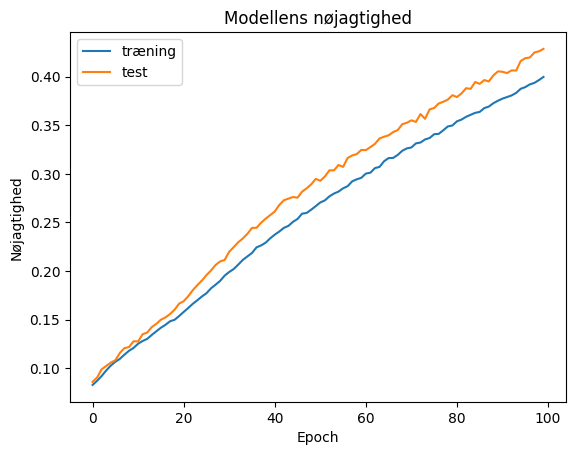

In [ ]:
plotAccuracy(epochs=100)

#### Tekstgenerering med den simple model

Til teksgenerering ud fra modellen, skal der foruden den trænede model bruges to ting. Det skal angives hvor mange ord, man gerne vil have genereret, og der skal angives en startsætningen. Startsætnignen skal angives, så modellen har nogle ord, hvorfra den kan forudsige det næste ord.

Nedenfor kan både antallet af ord og startsætning ændres, som man har lyst til.

In [ ]:
# @title Tekstgenerering
antal_ord = 100 # @param {type:"number"}
startsætning = 'En hærkonge sejlede fra Danmark til Grønland på en længere rejse for at' # @param {type:"string"}

generate_text(100, startsætning, antal_ord)

'faa og tog op og spurgte skjoldene torskebider den den huskarle eller have love at han ikke sparede forsøges « han mordet på ham og sigmund gik nu og sendte grød til holmgang thi han var staaet ud til sit tingsted sig og de havde været i steinvåg hakon havet de svang den var åben ben en herredsting som saarede var en aa af den ældste kappe var en grad paa sønd-hordeland og spurgte at han ikke spare en udvej og væk til at udrede bødesummen sigmund havde sagt at han skulde staa til retten da tog sig begavet fred'

#### Spørgsmål



*   Hvad sker der, hvis der ændres på længden af teksten?
*   Hvad sker der, hvis der ændres på startsætningen?
*   Giver de generede tekster mening?
*   Hvordan stemmer de generede tekster overens med nutidsdansk og islandske sagaer?
*   Hvordan afviger de generede tekster fra nutidsdansk og fra islandske sagaer?



## 200 epochs

Denne model er trænet i lidt over halvanden time og har en nøjagtighed på cirka 57%

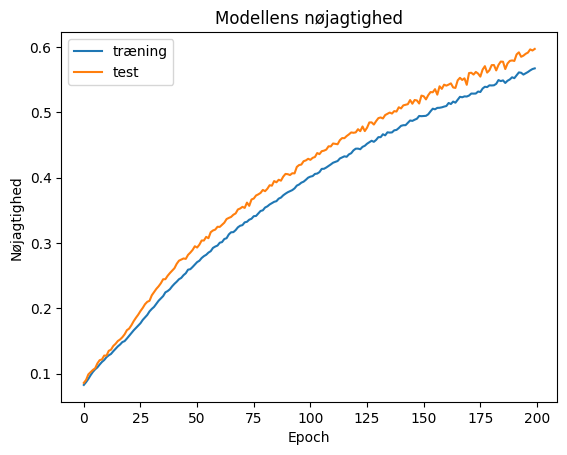

In [ ]:
plotAccuracy(epochs=200)

#### Tekstgenerering

Ligesom med den simple model kan I ændre på antal generede ord og startsætningen.

In [ ]:
# @title Tekstgenerering
antal_ord = 100 # @param {type:"number"}
startsætning = 'En hærkonge sejlede fra Danmark til Grønland på en længere rejse for at' # @param {type:"string"}

generate_text(200, startsætning, antal_ord)

'lede efter hinanden de gjorde de land ved gulvet en og børk sag bange for at undgaa blev bestemt at han ranede paa sommeren op til ulvarsfjæld og tolv øboer skrællingerne stod sig imod ham og sagde » hvorfor er det ikke udvalgt bøder og har det ikke at få kommet os bi at kaldte ham ud i den gård eller ukendt mænd men han var sket om sommeren forlod husfruen kong valdemar som nu er anderledes folk fredsted deres våben husfruen der hug sig kastet i brystet med hele helga opsøge vievand og helligdomme rejser i sted og blev'

#### Spørgsmål



*   Hvad sker der, hvis der ændres på længden af teksten?
*   Hvad sker der, hvis der ændres på startsætningen?
*   Hvordan er de generede tekster anderledes end ved den simple model?
*   Giver de generede tekster mening nu?
*   Hvordan stemmer de generede tekster overens med nutidsdansk og islandske sagaer?
*   Hvordan afviger de generede tekster fra nutidsdansk og fra islandske sagaer?


## 300 epochs

Denne model er trænet i cirka 2,5 timer og har en nøjagtighed på ..%

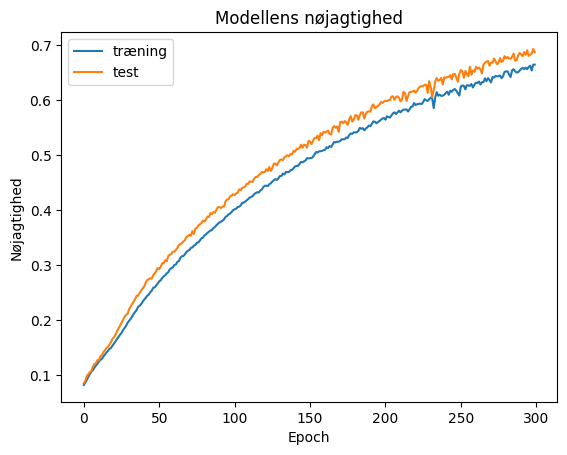

In [ ]:
plotAccuracy(epochs=300)

#### Tekstgenerering

Ligesom med den simple model kan I ændre på antal generede ord og startsætningen.

In [ ]:
# @title Tekstgenerering
antal_ord = 200 # @param {type:"number"}
startsætning = 'En hærkonge sejlede fra Danmark til Grønland på en længere rejse for at' # @param {type:"string"}

generate_text(300, startsætning, antal_ord)

'lede efter hinanden sidst svarede han at han tænkte ikke vilde at det fortælles om denne skibe når han er mange færdigheder og så da det gav det hvad være bedre som det sanghuset som var samlet og holde og det var dem paa island som det blev drevet tilbage som blev da færre og brændte døbt og havde vovede da drage tilbage fra sin seng men bad ham sige deres sindelag hartad 1001 var morgen og ham som paa hinanden stod af han vilde skille bredvikingerne gode og han paa frodaa og sværdet var høvding efter 30 mand i er hendes ejendom til samme lod de hugger hjem og badet endte med med sine hænder langs med hilsen og nu blev drevet tilbage i stuehuset tryggvason han havde gjordet men drev sig ind paa tunet derpå drog thoraren til viken og gik de ind i stuen med heden kjartan om natten paa bjørn gode landede der om vinteren og stærke og blev begravet staa der under mange vikinger at lysefjord mange anden mænd i bjørnshavn om sin bror og skal fortælle dig at han ikke skulde udføre bord ad ba

#### Spørgsmål



*   Hvordan stemmer de generede tekster overens med nutidsdansk og islandske sagaer?
*   Hvordan afviger de generede tekster fra nutidsdansk og fra islandske sagaer?
*   Sammenlign de generede tekster.
*   Hvilke muligheder er der ved tekstgenerering?
*   Hvilke udfrodringer er der ved tekstgenerering?
*   Hvad skal man overveje, hvis man bruger eksempelvis ChatGPT til at generere noget tekst for en?

In [ ]:
# @title Tekstgenerering
antal_ord = 100 # @param {type:"number"}
startsætning = 'En hærkonge sejlede fra Danmark til Grønland på en længere rejse for at' # @param {type:"string"}

generated_text = generate_text(400, startsætning, antal_ord)
print(generated_text)

fortælle om tidende de snublede og spurgte til sine rejsefæller at de vil gøre penge op således at jeg har hørt til at yde ham hvad randver deres far havgrim 38 at det andre end er sværere tid det sige mig sjælden at lidet « gudrid sætter bo langs sin død karlsemne fortalte ham om thorolf møde sagde at han havde intet tøj således kom ham derpå en stor høj sted der gav sig temmelig ligegyldig på ham og gav de nu vilde have bleven frem af døren mens havet og de fandt pejle nagler hvor øksnø — jord og


## Tekstanalyse

In [ ]:
import spacy
from spacy import displacy

In [ ]:
!python3 -m spacy download da_core_news_lg

2023-10-23 08:52:22.117359: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.1/567.1 MB 1.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('da_core_news_lg')


In [ ]:
nlp = spacy.load('da_core_news_lg')

In [ ]:
generated_text = 'Jeg bor i Danmark, hvis hovedstad er København.'


doc = nlp(generated_text)
displacy.render(doc, style="dep",jupyter=True, options={'distance':120})

In [ ]:
print(f'{"Tekst":{20}} {"Coarse tag":{20}} {"Fine grained tag":{20}} {"Forklaring til fine grained tag":{40}} {"Dependency Tag":{20}} {"Forklaring til dependency tag":{10}}')
print()
for t in doc:
    print(f'{t.text:{20}} {t.pos_:{20}} {t.tag_:{20}} {spacy.explain(t.tag_):{40}} {t.dep_:{20}} {spacy.explain(t.dep_):{10}}')

Tekst                Coarse tag           Fine grained tag     Forklaring til fine grained tag          Dependency Tag       Forklaring til dependency tag

Jeg                  PRON                 PRON                 pronoun                                  nsubj                nominal subject
bor                  VERB                 VERB                 verb                                     ROOT                 root      
i                    ADP                  ADP                  adposition                               case                 case marking
Danmark              PROPN                PROPN                proper noun                              obl                  oblique nominal
,                    PUNCT                PUNCT                punctuation                              punct                punctuation
hvis                 SCONJ                SCONJ                subordinating conjunction                mark                 marker    
hovedstad      

In [ ]:
doc = nlp(generated_text)
displacy.render(doc, style="ent",jupyter=True, options={'distance':120})

In [ ]:
for ent in doc.ents:
  print(ent.text, ':', ent.label_, ':', spacy.explain(ent.label_))

Danmark : LOC : Non-GPE locations, mountain ranges, bodies of water
København : LOC : Non-GPE locations, mountain ranges, bodies of water
